<a href="https://colab.research.google.com/github/LPValente/TensorFlow2.0/blob/main/TF2_Linear_Regression_Live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-05-20 22:51:33--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-05-20 22:51:33 (34.2 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
!head 'moore.csv'

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [ ]:
# Load in the data
data= pd.read_csv('moore.csv', header=None).to_numpy()

In [ ]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [ ]:
X = data[:,0].reshape(-1,1) # making an N x D matrix
y = data[:,1]

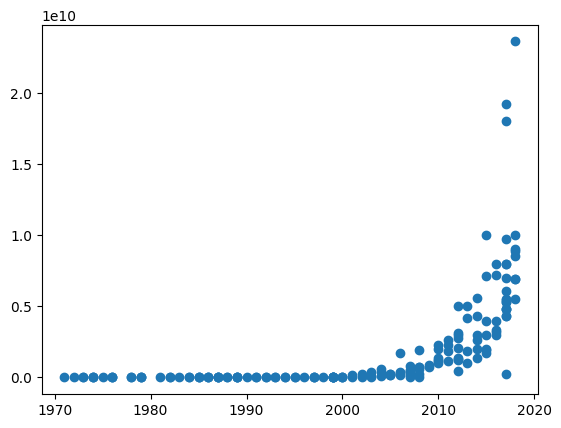

In [ ]:
# Plot the data
plt.scatter(X, y)

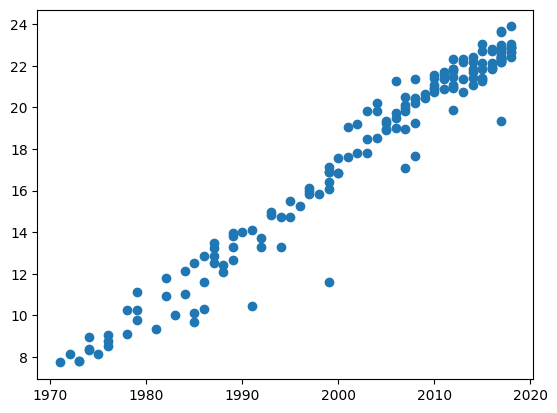

In [ ]:
y = np.log(y)
plt.scatter(X,y)

In [ ]:
X = X - X.mean()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),
    loss='mse',
)

In [ ]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 8ms/step - loss: 339.3521 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 362.2863 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 239.9734 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 202.9082 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 8ms/step - loss: 162.2362 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 7ms/step - loss: 145.5156 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 95.8452 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 7ms/step - loss: 88.0538 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 8ms/step - loss: 100.0652 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 7ms/step - loss: 95.4091 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 9ms/step - loss: 

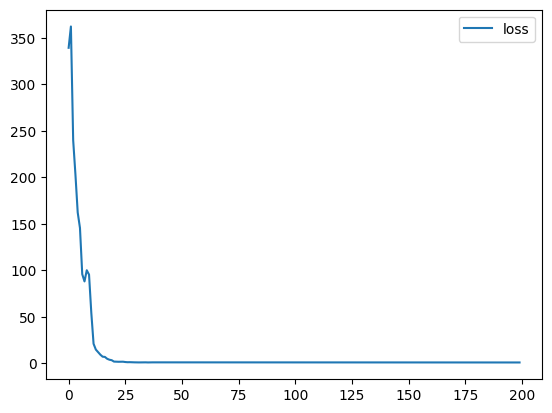

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [ ]:
model.layers

In [ ]:
model.layers[0].get_weights()

[array([[0.33796322]], dtype=float32), array([17.77633], dtype=float32)]

In [ ]:
a = model.layers[0].get_weights()[0][0,0]

In [ ]:
a

0.33796322

In [ ]:
print("Time to double:", np.log(2) / a)

Time to double: 2.0509544602785645


In [ ]:
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(y) - y.mean() * X.sum() ) / denominator
b = ( y.mean() * X.dot(X) - X.mean() * X.dot(y) ) / denominator
print(a, b)

0.341682487387313 17.764939393631764


In [ ]:
print("Time to double:", np.log(2) / a)

Time to double: 2.0286295205239204


# Part 2

6/6 [==============================] - 0s 4ms/step


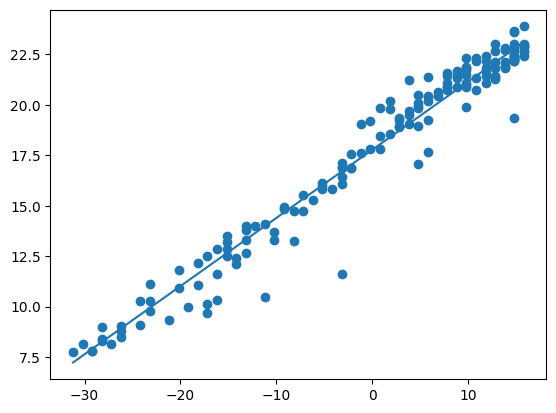

In [ ]:
# make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, y)
plt.plot(X, Yhat)

In [ ]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape x because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == fpr floating points
np.allclose(Yhat, Yhat2)

True